In [1]:
%matplotlib inline

import rasterio as rio
from rasterio.features import sieve
from rasterio.plot import show

import geopandas as gpd
from shapely.geometry import Point
from os import path
import numpy as np
from matplotlib import pyplot as plt

In [2]:
in_img = r"C:\AAA\marine_debris\2_664.tif"
in_pts = r"C:\AAA\marine_debris\2_664_pts_utm4n.geojson"

In [3]:
img = rio.open(in_img, 'r+')
pts = gpd.read_file(in_pts)

In [4]:
bands = [img.read(1, masked=True),
        img.read(2, masked=True),
        img.read(3, masked=True)]



In [6]:
bands[0]

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [56 55 52 ..., 54 50 48]
 [55 54 53 ..., 56 63 44]
 [50 49 48 ..., 56 54 35]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]],
       fill_value = 999999)

In [ ]:
def mask_raster(bands, no_data_value, sieve_size, inverted):
    masks = []
    for band_num, band in enumerate(bands):
        band_mask = np.ma.masked_where(band == no_data_value, band)
        masks.append(band_mask.mask)
        
    if len(bands >=3):
        masks_array = np.array(masks)
        intersect_mask = masks_array.all(axis=0).astype(np.uint8)
        
    sieved_mask = sieve(intersect_mask, size=sieve_size).astype(np.bool_)
    
    if inverted == True:
        inverted_sieved_mask = np.invert(sieved_mask)
        return inverted_sieved_mask
    else:
        return sieved_mask

In [ ]:
mask = mask_raster(bands, 0, 200, True)

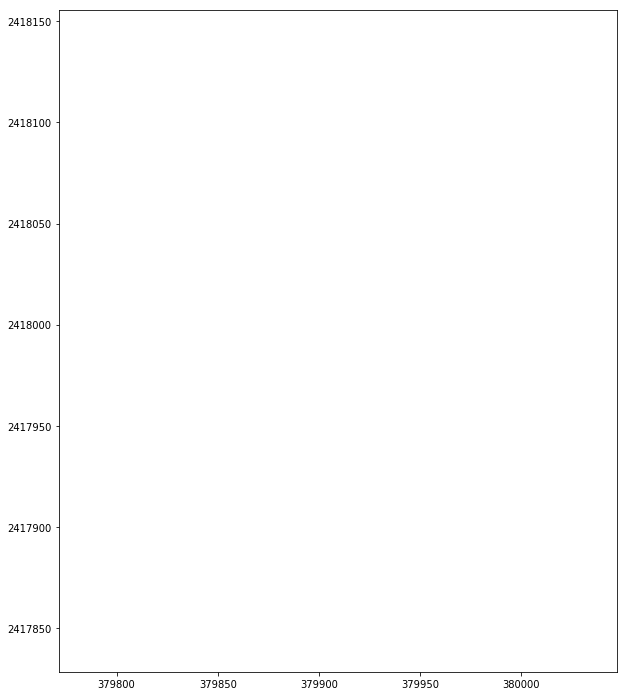

In [14]:
plt.figure(1, figsize=(10,20))
ax1 = plt.subplot(111)

plt.imshow(bands[0])
#plt.scatter(pts.geometry.x, pts.geometry.y, zorder=1)

ax1.set_xlim(min(pts.geometry.x), max(pts.geometry.x))
ax1.set_ylim(min(pts.geometry.y), max(pts.geometry.y))

#plt.xlim(min(pts.geometry.x), max(pts.geometry.x))
#plt.ylim(min(pts.geometry.y), max(pts.geometry.y))

plt.show()

In [ ]:
print(min(pts.geometry.x), max(pts.geometry.x), min(pts.geometry.y), max(pts.geometry.y))